In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('original_data_w_metrics.tsv', sep='\t')
df.head(3)

,question,ground_truths,contexts,answers,faithfulness,answer_relevancy,context_precision
0,как настроить кайлу в проекте?,"[""'Чтобы создать новый проект CAILA и настроит...","['Как подключить канал Aimychat', 'Как добавит...",Для настройки CAILA в проекте вам необходимо в...,0.545455,0.902518,0.142857
1,При использовании $caila в сценарии тратятся л...,['\'Да. При обращении к сервису классификации ...,['Обработка переполнения $session и $client в ...,"Нет, при использовании $caila в сценарии не тр...",0.000000,0.968961,0.000000
2,Вопрос от по использованию SalesForce - операт...,"[""'Происходит событие closeChat'""]",['Остальная информация будет отправлена на веб...,При завершении чата со стороны клиента в Sales...,0.500000,0.935903,0.125000


In [4]:
print(f'Answer relevancy: {df.answer_relevancy.mean():.2f}')
print(f'Context precision: {df.context_precision.mean():.2f}')
print(f'Faithfulness: {df.faithfulness.mean():.2f}')

Answer relevancy: 0.90
Context precision: 0.26
Faithfulness: 0.45


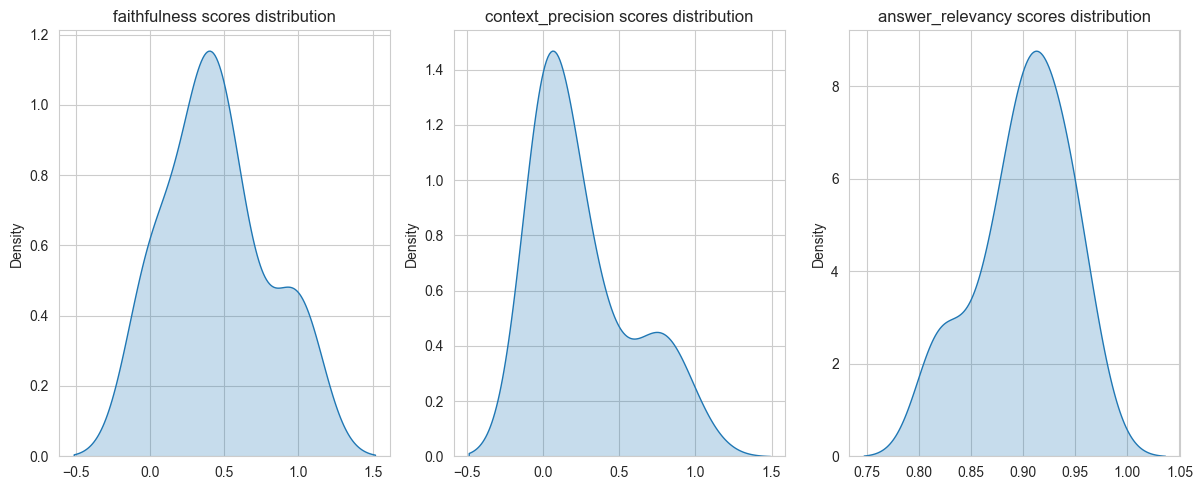

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analysis(zephyr_df):
  sns.set_style("whitegrid")
  fig, axs = plt.subplots(1,3, figsize=(12, 5))
  for i,col in enumerate(zephyr_df.columns):
    sns.kdeplot(data=[zephyr_df[col].values],legend=False,ax=axs[i],fill=True)
    axs[i].set_title(f'{col} scores distribution')
  plt.tight_layout()
  plt.show()

# result_zephyr_df = df.to_pandas()
analysis(
    df[['faithfulness', 'context_precision', 'answer_relevancy']]
    ) 

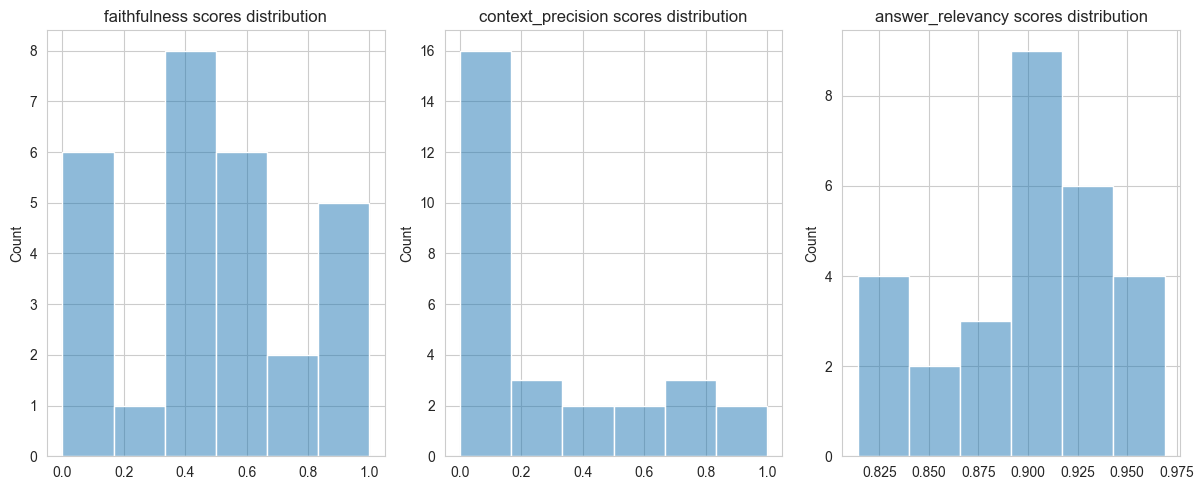

In [6]:
def hist(df):
  sns.set_style("whitegrid")
  fig, axs = plt.subplots(1,3, figsize=(12, 5))
  for i,col in enumerate(df.columns):
    sns.histplot(data=[df[col].values],legend=False,ax=axs[i],fill=True)
    axs[i].set_title(f'{col} scores distribution')
  plt.tight_layout()
  plt.show()

hist(
    df[['faithfulness', 'context_precision', 'answer_relevancy']]
    ) 